# Simulação do Processo de Poisson

Nesta parte, queremos simular um processo de Poisson utilizando uma distribuição uniforme. A ideia é dividir uma janela de tempo T em pequenos intervalos de tempo $\Delta t$, e em cada intervalo, decidir se um evento ocorre ou não comparando um número aleatório uniforme com um limite baseado na taxa $\lambda$

**Parte (a): Simulação do Processo de Poisson**

*Passos:*

1- Criamos uma janela de tempo T = 1000 e dividimos em pequenos intervalos de $\Delta t = 1$;

2 - Geramos números aleatórios *r* uniformemente distribuídos entre 0 e 1 para cada intervalo de tempo;

3 - Se $r < \lambda \cdot \Delta t$, então um evento ocorre naquele intervalo 

**Parte (b): Verificação das Estatísticas de Poisson**

Agora, contamos o número de eventos que ocorreram e verificamos a média e variância dos eventos. Também calculamos a diferença de tempo entre eventos consecutivos e comparamos isso com uma distribuição exponencial, que é esperado em um processo de Poisson.

*Passos:*

1- Contamos os eventos e calculamos a média e variância.

2- Calculamos as diferenças de tempo entre eventos consecutivos e geramos um histograma para verificar se segue uma distribuição exponencial.

**Parte (c): Selecionando N Eventos Aleatótios**

Nesta parte, ao invés de decidir a presença de um evento com base em um limite, escolhemos diretamente *N* eventos aleatórios dentro de uma janela de tempo grande. Verificamos se os tempos entre eventos ainda seguem uma distribuição aproximadamente Poissoniana.

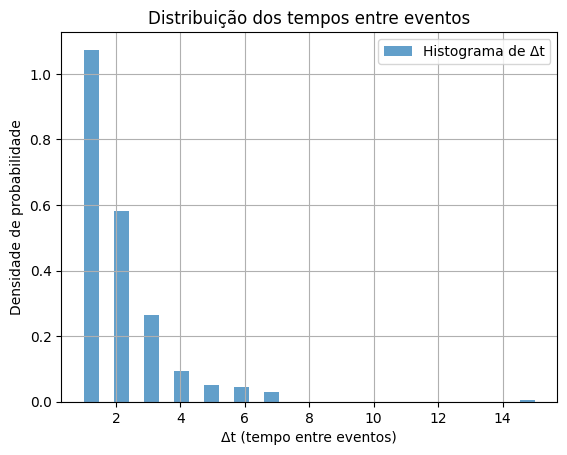

Média dos eventos: 0.51
Variância dos eventos: 0.24989999999999998
Primeiras diferenças de tempo entre eventos simulados: [1 1 2 1 1]
Primeiras diferenças de tempo entre eventos aleatórios: [0.07182638 0.56476243 0.81689434 1.96756003 0.32855309]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da simulação
T = 1000  # Janela de tempo total
dt = 1    # Intervalo de tempo (tamanho do bin)
lambda_rate = 5 / 10  # Taxa média de eventos por unidade de tempo (λ = 0.5)

# Parte (a) - Simular processo de Poisson
# Criando os intervalos de tempo
time_bins = np.arange(0, T, dt)

# Gerando números aleatórios uniformemente distribuídos [0, 1]
random_numbers = np.random.uniform(0, 1, size=len(time_bins))

# Definindo o limite para comparação com a taxa λ * dt
threshold = lambda_rate * dt

# Registrando eventos: quando número aleatório é menor que o limite
events = random_numbers < threshold  # Boolean array indicando onde há eventos

# Coletando os tempos dos eventos
event_times = time_bins[events]

# Parte (b) - Verificar se os eventos seguem estatísticas de Poisson
# Contar eventos e calcular média e variância
mean_count = np.mean(events)
var_count = np.var(events)

# Calcular as diferenças de tempo entre eventos consecutivos
time_diffs = np.diff(event_times)

# Gerar histograma das diferenças de tempo entre eventos
plt.hist(time_diffs, bins=30, density=True, alpha=0.7, label="Histograma de Δt")
plt.xlabel("Δt (tempo entre eventos)")
plt.ylabel("Densidade de probabilidade")
plt.title("Distribuição dos tempos entre eventos")
plt.legend()
plt.grid(True)
plt.show()

# Parte (c) - Selecionar N eventos aleatoriamente em uma janela grande
N = len(event_times)  # Número total de eventos simulados
random_event_times = np.sort(np.random.uniform(0, T, size=N))  # N eventos aleatórios

# Calcular as diferenças de tempo para esses eventos aleatórios
random_time_diffs = np.diff(random_event_times)

# Exibir resultados principais
print(f"Média dos eventos: {mean_count}")
print(f"Variância dos eventos: {var_count}")
print(f"Primeiras diferenças de tempo entre eventos simulados: {time_diffs[:5]}")
print(f"Primeiras diferenças de tempo entre eventos aleatórios: {random_time_diffs[:5]}")


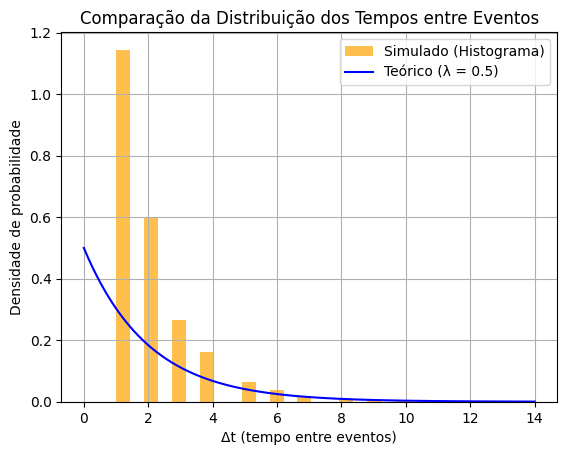

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parâmetros da simulação
T = 10000  # Janela de tempo total
dt = 1    # Intervalo de tempo (tamanho do bin)
lambda_rate = 5 / 10  # Taxa média de eventos por unidade de tempo (λ = 0.5)

# Parte (a) - Simular processo de Poisson
time_bins = np.arange(0, T, dt)
random_numbers = np.random.uniform(0, 1, size=len(time_bins))

# Definir limite para a comparação com λ * dt
threshold = lambda_rate * dt
events = random_numbers < threshold

# Coletar os tempos dos eventos
event_times = time_bins[events]

# Parte (b) - Calcular diferenças de tempo entre eventos
time_diffs = np.diff(event_times)

# Gerar histograma dos tempos entre eventos simulados
plt.hist(time_diffs, bins=30, density=True, alpha=0.7, label="Simulado (Histograma)", color='orange')

# Parte Teórica - Gerar distribuição exponencial teórica
x_vals = np.linspace(0, max(time_diffs), 1000)  # valores para o eixo x
pdf_theoretical = lambda_rate * np.exp(-lambda_rate * x_vals)  # PDF teórica da exponencial

# Plotar a curva teórica
plt.plot(x_vals, pdf_theoretical, label=f"Teórico (λ = {lambda_rate})", color='blue')

# Ajustes no gráfico
plt.xlabel("Δt (tempo entre eventos)")
plt.ylabel("Densidade de probabilidade")
plt.title("Comparação da Distribuição dos Tempos entre Eventos")
plt.legend()
plt.grid(True)

# Exibir gráfico
plt.show()
